<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500, height=450>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Домашнее задание: соревнование на Kaggle по распознаванию одежды</b></h2>

---

Всем привет!  

Надеемся, что вам показались интересными и понятными лекция и семинар по многослйным нейросетям и PyTorch. Если же Вы ещё не успели ими насладиться -- просьба посмотреть видео на нашем канале и просмотреть ноутбуки с семинара, в этом ноутбуке эти знания будут использоваться на практике.

<h2 style="text-align: center;"><b>FashionMNIST</b></h2>

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

Выше изображены примеры того, с чем мы будем работать -- чёрно-белые изображения одежды. Слева более классический датасет -- MNIST, он же датасет рукописных цифр. Мы решили, что вам будет интереснее всё же рнаучить машину распознавать одежду (спойлер: с рукописными цифрами такой подход это тоже будут работать ;)

<h3 style="text-align: center;"><b>Скачать датасет: https://www.kaggle.com/zalando-research/fashionmnist  
    (просто нажмите кнопку "Download")</b></h3> 

<h3 style="text-align: center;"><b>Ссылка на соревнование: https://www.kaggle.com/t/a1fb668ae8ae454caa76d99da0e68301</b></h3> 

После скачивания (скачанный архив распакуйте в одну папку с этим ноутбуком) и регистрации на Kaggle Вам нужно вступить в соревнование (по ссылке выше) и прочитать его описание.

<h3 style="text-align: center;"><b>Пожалуйста, укажите в соревновании свой ник == вашему нику на Canvas, иначе мы не сможем потом поставить вам баллы</b></h3>

Платформа **Kaggle** -- основная платформа для соревнований в Data Science, так что привыкайте ;)

<h2 style="text-align: center;"><b>Данные</b></h2>

Мы будем работать с картинками одежды (чёрно-белыми, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды. Давайте посмотрим на то, что за датасет мы скачали:

In [50]:
import pandas as pd

In [51]:
TRAIN_PATH = './data/fashion-mnist_train.csv'
TEST_PATH = './data/fashion-mnist_test.csv'

In [52]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

In [53]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Выведем начало таблиц:

In [54]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Выведем размеры обучающей и тестовой выборок:

In [7]:
train_df.shape

(60000, 785)

In [8]:
test_df.shape

(10000, 785)

Что значат эти размеры и числа внутри DataFrame'ов? Всё просто -- **каждая строчка соответствует одной картинке**, а **столбцы -- это значения в пикселях этой кратинки**. **Первый столбец в train_df говорит о типе (классе) одежды (от 0 до 9)**.  

Однако перед тем, как двигаться дальше, краткая информация о представлении изображений в компьютере:

<h2 style="text-align: center;"><b>Изображения</b></h2>

<p align=center><img src="https://openclipart.org/image/2400px/svg_to_png/136057/1304647802.png" width=300 height=300></p>

Как и вся информация, изображения представляются в компьютере числами. Стандартное цветовое пространство, с помощью которого декодируют и отрисовывают изображение -- это RGB (Red, Green и Blue). Каждая комбинация трёх чисел от 0 до 255 задаёт какой-то цвет. Например, (255,255,255) задаёт белый цвет, (255,0,0) -- красный. Также происходит и при загрузке картинок в Python, давайте посмотрим напрмиере:

* Загрузим произвольную цветную картинку с помощью matplotlib:

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
image_png = plt.imread('./fpmi_logo.png')

In [11]:
image_png

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

* Посмотрим на тип загруженного объекта:

In [12]:
type(image_png)

numpy.ndarray

Интересно, картинка стала `numpy.array`. А какая его форма и что внутри?

In [13]:
image_png.shape

(573, 1579, 4)

In [14]:
image_png[0].shape

(1579, 4)

In [15]:
image_png[0]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [16]:
image_png.dtype

dtype('float32')

То есть это какая матрица, а точнее тензор (потому что есть третья размерность), у которого 573 строки, 1579 столбцов и 4 канала. Можно представлять это себе как 4 наложенных друг на друга матрицы, каждая из которых отвечает за один цвет -- R, G и B.  Внутри всех этих матриц лежат числа типа float32, то есть вещественные. Тут стоит сказать, что это просто тонкости загрузки в matplotlib -- на самом деле это матрицы из целых числе от 0 до 255 (включительно).

Стоп, но ведь каналов 4, а не 3? Да, четвёртый канал в данном случае -- это альфа-канал, у .png картинок он обычно присутствует. Давайте попробуем загрузить .jpg картинку:

In [17]:
image_jpg = plt.imread('./dlschool_logo.jpg')

In [18]:
image_jpg.shape

(400, 400, 3)

Отлично, теперь 3 канала и нам совсем не страшно -- это три матрицы 400 на 400, каждая из которых отвечает за один цвет. Давайте отрисуем две загруженные картинки с помощью matplotlib:

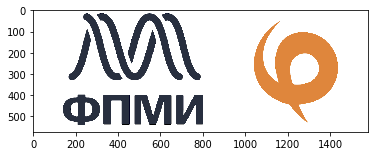

In [19]:
plt.imshow(image_png);

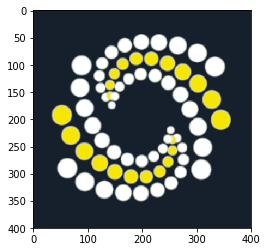

In [20]:
plt.imshow(image_jpg);

В данном случае **пиксель** -- это кортеж (упорядоченная последовательность чисел), состоящий из трёх чисел (как в примере раньше, например, (255,0,0) -- полностью красный пиксель). 

Итак, картинки -- это матрицы, состоящие из чисел, которые характеризуют насышенность данного пикселя определённым цветом цветом.  

Аналогично и с **чёрно-белыми изображениями** -- это просто матрица с одним каналом (то есть пксель -- это просто число), например, 28 на 28, каждое число которой от 0 до 255 характеризует яркость пикселя (насыщенность белым). 
Например, 255 -- это полностью белый пиксель, 0 -- полностью чёрный. Пора посмотреть, с чем мы будем работать в соревновании.

<h2 style="text-align: center;"><b>Данные (2)</b></h2>

Вернёмся к данным:

In [21]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [22]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Самый первый столбец -- **label**. Подробнее:

каждая картинка иметт класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

In [55]:
train_df.values[0]

array([  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
         0,   0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235,
       222, 255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180,
       207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 21

Видно, что это картинка типа Pullover (класс 2).

**Примечание:** у тестового датасета нужно удалить столбец label (по понятным причинам) -- вам нужно будет его предсказать и отправить эти предсказания в Kaggle.

Итак, мы имеем 60000 картинок, у каждой известна метка класса (то есть что это за одежда).  
Отделим `X` (признаковое описание объектов) и `y` (метки классов):

In [24]:
X_train = train_df.values[:, 1:]
y_train = train_df.values[:, 0]

X_test = test_df.values[:, 1:]  # удаляем столбец 'label'

In [25]:
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [26]:
print(X_test.shape)

(10000, 784)


Но почему пиксели так странно представлены? На самом деле 784 пикселя -- это 28 * 28, то есть это "развёрнутая в строку" чёрно-белая картинка 28 на 28 пикселей.

Давайте убедимся в этом, отрисовав несколько (можете менять индекс и смотрть на отрисовку):

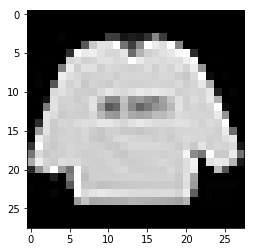

In [27]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray');

Не слишком похоже на пулловер, правда? :)  
    
Просто если мы будем использовать изображения большего разрешения, нам понадобятся бОльшие вычислительные мощности, поэтому пока что будем довольствоваться такими размерами.

Отлично, мы убедились в том, что имеем 60k картинок с метками для обучения, картинки "развёрнуты" в строку. Зачем разворачивать в строку? Потому что каждый пиксель в данном случае -- это один признак, то есть всего 784 признака, и уже их мы будем взвешивать нашей нейросетью, то есть у одного нейрона на входном слое будет 784 веса (+ Bias,  то есть 785 весов), на каждый пиксель по весу, и дальше уже будут второй слой, третий слой и так далее..

Время тренировать нейросети!

<h2 style="text-align: center;"><b>Нейросеть на PyTorch</b></h2>

Надеемся, что вы уже прорешали семинар, там довольно подробно всё описано. На всякий случай ещё раз напомним, из чего состоит процесс обучения нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят, например, типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество **итераций обучения** (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

In [43]:
import matplotlib.pyplot as plt
import numpy as np

import torch

Проверим версию PyTorch:

In [44]:
torch.__version__

'1.1.0'

Сначала обернём данные в тензоры пайторча (может занять некоторое время):

In [45]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))

Проверим:

In [31]:
print(X_train_tensor.shape, y_train_tensor.shape)

torch.Size([60000, 784]) torch.Size([60000])


In [0]:
y_train_tensor.unique()

На лекции обсуждалось, что нельзя просто запихнуть в LogLoss (основная функция потерь для задачи классификации, [как мы помним](https://drive.google.com/open?id=15wdyreZufKDxNQ55v4cl4Em2rtj7Q45B)) метки классов, предлагаем вам самим ещё раз подумать, почему. На всякий случай -- [ноутбук с более подробной информацией о функциях потерь](https://drive.google.com/open?id=1j6WpzeJQV1kS1Os4VJ0Avf68OkXVBo6W).

Так вот, нам надо преобразовать метки классов из целых чисел в OneHot-кодированные метки (если вам не знакомо это слово, [посмотрите первую половину этого видео](https://www.youtube.com/watch?v=ufkDhrngcr0)):

In [32]:
length = y_train_tensor.shape[0]
num_classes = 10  # количество классов, в нашем случае 10 типов одежды

# закодированные OneHot-ом метки классов
y_onehot = torch.FloatTensor(length, num_classes)

y_onehot.zero_()
y_onehot.scatter_(1, y_train_tensor.view(-1, 1), 1)

print(y_train_tensor)
print(y_onehot)

tensor([2, 9, 6,  ..., 8, 8, 7])
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]])


Видим, что наши метки перешли в вид "единица там, где номер класса, а остальные нули".

Напишем код, очень похожий на код с семинара: возьмём два слоя -- входной и один скрытый (выходной обычно не считают, но он тоже есть):

In [33]:
# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 100, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

Обратите внимание:  

`D_in` -- это входная размерность (784 признака -- пикселя)  
`D_out` -- выходная размерность (10 классов -- типов одежды), то есть 10 нейронов на выходном слое  
`H` -- количество нейронов в скрытом слое  

Осталось выбрать Loss (функцию потерь) и метод оптимизации, с помощью которого мы будем считать градиенты и обновлять с помощью них обновлять веса.  

Loss мы выберем CrossEntropy, то есть кросс-энтропию, этот лосс почти всегда используется в задаче многоклассовой классификации (см. лекцию и ноутбук [loss_functions.ipynb](https://drive.google.com/open?id=1j6WpzeJQV1kS1Os4VJ0Avf68OkXVBo6W), там всё подробно объясняется), а метод оптимизации выберем обычный SGD (Stochastic Gradient Descent, стохастический градиентный спуск, см. лекцию про нейрон).

---

Однако перед тем, как перейти к коду обучения нейросети, есть одна тонкость -- **батчи**, а точнее **мини-батчи**.

**Мини-батчи** -- это небольшие (обычно размера 16, 32 или 64) "куски" выборки, то есть мини-батч размера 64 -- это 64 объекта из датасета. Обычно мини-батч называют просто батч (batch).

Так вот: методы оптимиазции по типу стохастического градиентного спуска часто считаются не под одному объекту (в этом случае оптимизация будет очень нестабильная, "шумная"), а по нескольким -- по батчу. То есть в обычном градиентном спуске будет сумма по всей выборке, в стохастическом (чистом варианте) -- по одному объекту, а "между ними" -- мини-батч SGD, то есть подсчёт градиентов на небольшом кусочке данных.

Одна **итерация (iteration)** алгоритма оптимизации -- это проход по одному батчу.
Одна **эпоха (epoch)** алгоритма оптимизации -- это проход по всей выборке. 

То есть, например, если выборка размера 60000, а батч размера 64, то одна эпоха занимает 60000 / 64 = 937,5 = 938 итераций.

---

Напишем функцию, генерирующую батчи:

In [34]:
def generate_batches(X, y, batch_size=64):
    for i in range(0, X.shape[0], batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        yield X_batch, y_batch

Код обучения нейросети (обязателньо убедитесь, что понимаете, что делает каждая строчка -- это необходимо для ваших дальнейших экспериментов):

In [35]:
BATCH_SIZE = 64
NUM_EPOCHS = 100

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 2000))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[0, 100] current loss: 7.262929985046386
[0, 200] current loss: 7.254175765991211
[0, 300] current loss: 7.234230827331543
[0, 400] current loss: 7.242286369323731
[0, 500] current loss: 7.244798454284668
[0, 600] current loss: 7.2099205551147465
[0, 700] current loss: 7.246974029541016
[0, 800] current loss: 7.257918930053711
[0, 900] current loss: 7.245166137695312
[1, 100] current loss: 7.2294076080322265
[1, 200] current loss: 7.248431907653808
[1, 300] current loss: 7.2318158493041995
[1, 400] current loss: 7.235235641479492
[1, 500] current loss: 7.237606460571289
[1, 600] current loss: 7.207125137329101
[1, 700] current loss: 7.247513786315918
[1, 800] current loss: 7.25355135345459
[1, 900] current loss: 7.24185066986084
[2, 100] current loss: 7.22651205444336
[2, 200] current loss: 7.248248344421387
[2, 300] current loss: 7.230084663391113
[2, 400] current loss: 7.23401530456543
[2, 500] current loss: 7.2369189453125
[2, 600] current loss: 7.2060185546875
[2, 700] current loss

[22, 200] current loss: 6.790551132202149
[22, 300] current loss: 6.747501853942871
[22, 400] current loss: 6.7800911407470705
[22, 500] current loss: 6.751438537597656
[22, 600] current loss: 6.702027141571045
[22, 700] current loss: 6.794526870727539
[22, 800] current loss: 6.750273979187011
[22, 900] current loss: 6.748002647399902
[23, 100] current loss: 6.736211307525635
[23, 200] current loss: 6.739166049957276
[23, 300] current loss: 6.66689448928833
[23, 400] current loss: 6.698460220336914
[23, 500] current loss: 6.6431529998779295
[23, 600] current loss: 6.630404003143311
[23, 700] current loss: 6.62502949142456
[23, 800] current loss: 6.64083716583252
[23, 900] current loss: 6.65462190246582
[24, 100] current loss: 6.629375907897949
[24, 200] current loss: 6.689835262298584
[24, 300] current loss: 6.597718379974365
[24, 400] current loss: 6.6762190971374515
[24, 500] current loss: 6.586088348388672
[24, 600] current loss: 6.574091396331787
[24, 700] current loss: 6.589791843

[43, 900] current loss: 6.240188217163086
[44, 100] current loss: 6.260005409240723
[44, 200] current loss: 6.310280242919922
[44, 300] current loss: 6.236417831420899
[44, 400] current loss: 6.3135213356018065
[44, 500] current loss: 6.228942474365234
[44, 600] current loss: 6.224336589813232
[44, 700] current loss: 6.266042671203613
[44, 800] current loss: 6.251198986053467
[44, 900] current loss: 6.259371406555176
[45, 100] current loss: 6.250816307067871
[45, 200] current loss: 6.331028285980224
[45, 300] current loss: 6.254269905090332
[45, 400] current loss: 6.300525714874268
[45, 500] current loss: 6.230689556121826
[45, 600] current loss: 6.218351261138916
[45, 700] current loss: 6.2435702743530275
[45, 800] current loss: 6.260621414184571
[45, 900] current loss: 6.253662147521973
[46, 100] current loss: 6.260377838134765
[46, 200] current loss: 6.296968391418457
[46, 300] current loss: 6.259722187042236
[46, 400] current loss: 6.3302963180542
[46, 500] current loss: 6.24071857

[65, 900] current loss: 6.266645206451416
[66, 100] current loss: 6.238168632507324
[66, 200] current loss: 6.3694755859375
[66, 300] current loss: 6.312927421569825
[66, 400] current loss: 6.266866870880127
[66, 500] current loss: 6.246982891082764
[66, 600] current loss: 6.209106021881103
[66, 700] current loss: 6.256900459289551
[66, 800] current loss: 6.263331680297852
[66, 900] current loss: 6.24278148651123
[67, 100] current loss: 6.229856647491455
[67, 200] current loss: 6.284753032684327
[67, 300] current loss: 6.217478630065918
[67, 400] current loss: 6.273051742553711
[67, 500] current loss: 6.216478832244873
[67, 600] current loss: 6.1987572746276856
[67, 700] current loss: 6.228663272857666
[67, 800] current loss: 6.266685161590576
[67, 900] current loss: 6.248814083099365
[68, 100] current loss: 6.214126640319824
[68, 200] current loss: 6.293005630493164
[68, 300] current loss: 6.219709381103516
[68, 400] current loss: 6.282389446258545
[68, 500] current loss: 6.2586902885

[87, 800] current loss: 6.2317269401550295
[87, 900] current loss: 6.226985694885254
[88, 100] current loss: 6.214113620758057
[88, 200] current loss: 6.276972930908203
[88, 300] current loss: 6.228376895904541
[88, 400] current loss: 6.255006061553955
[88, 500] current loss: 6.175625801086426
[88, 600] current loss: 6.183720043182373
[88, 700] current loss: 6.308792293548584
[88, 800] current loss: 6.23469005203247
[88, 900] current loss: 6.264405208587647
[89, 100] current loss: 6.356043533325195
[89, 200] current loss: 6.267337886810303
[89, 300] current loss: 6.210180324554443
[89, 400] current loss: 6.235236862182617
[89, 500] current loss: 6.1756052474975585
[89, 600] current loss: 6.176254688262939
[89, 700] current loss: 6.2223729972839354
[89, 800] current loss: 6.234417434692383
[89, 900] current loss: 6.2240321121215825
[90, 100] current loss: 6.224436725616455
[90, 200] current loss: 6.277641613006592
[90, 300] current loss: 6.2072857551574705
[90, 400] current loss: 6.2389

Отлично, мы получили обученную нейросеть. Давайте измерим качество на обучающей выбоорке:

In [36]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top :  0 %
Accuracy of Trouser :  0 %
Accuracy of Pullover : 80 %
Accuracy of Dress : 90 %
Accuracy of  Coat : 77 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 76 %
Accuracy of Sneaker :  0 %
Accuracy of   Bag : 96 %
Accuracy of Ankle boot :  0 %


Уже сейчас видно, что сеть далеко не идеально -- она предсказывает только 7 классов, а про некоторые просто "забывает".

Теперь предскажем на тестовой и сохраним предсказания в файл. Это ни что иное, как baseline, который вам надо побить, чтобы получить хоть какие-то ненулевые баллы за это ДЗ.

In [37]:
y_test_pred = net(torch.FloatTensor(X_test))

In [42]:
y_test_pred

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]], grad_fn=<SoftmaxBackward>)

In [39]:
y_test_pred[:5]

tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], grad_fn=<SliceBackward>)

Преобразуем OneHot'ы в числовые метки:

In [40]:
_, predicted = torch.max(y_test_pred, 1)

predicted

tensor([6, 3, 2,  ..., 8, 8, 2])

Сохраним в датафрейм:

In [41]:
answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df.head()

,Category
0,6
1,3
2,2
3,6
4,3


In [46]:
answer_df['Id'] = answer_df.index

In [47]:
answer_df.head()

,Category,Id
0,6,0
1,3,1
2,2,2
3,6,3
4,3,4


In [48]:
answer_df.tail()

,Category,Id
9995,6,9995
9996,6,9996
9997,8,9997
9998,8,9998
9999,2,9999


Отлично, созраним в файл и отправим:

In [49]:
answer_df.to_csv('./baseline.csv', index=False)

В точности этот файл и есть **baseline.csv**, который вы видите на лидерборде и который вам нужно побить.

<h2 style="text-align: center;"><b>Задание</b></h2>

Добейтесь как можно лучшего качества в соревновании!  

Используйте знания, полученные на занятиях и те, которые вы найдёте в интернете. Если у вас получится, можете использовать и свёрточные нейросети, а не только полносвязные. Вам нужно как минимум побить baseline.

*Рекомендация*: попробуйте поменять количество итераций, количество нейронов, количество слоёв, гиперпараметры сети (learning_rate, метод оптимизации вместо SGD можно взять другой)

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch

TRAIN_PATH = './data/fashion-mnist_train.csv'
TEST_PATH = './data/fashion-mnist_test.csv'
train_df = pd.read_csv(TRAIN_PATH)

X = train_df.values[:, 1:]
y = train_df.values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))
print(X_train_tensor.shape, y_train_tensor.shape)
y_train_tensor.unique()

length = y_train_tensor.shape[0]
num_classes = 10  # количество классов, в нашем случае 10 типов одежды

# закодированные OneHot-ом метки классов
y_onehot = torch.FloatTensor(length, num_classes)
y_onehot.zero_()
y_onehot.scatter_(1, y_train_tensor.view(-1, 1), 1)

print(y_train_tensor)
print(y_onehot)


# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв;
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 80, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

def generate_batches(X, y, batch_size=64):
    for i in range(0, X.shape[0], batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        yield X_batch, y_batch


BATCH_SIZE = 32
NUM_EPOCHS = 80

loss_fn = torch.nn.NLLLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for epoch_num in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)

        running_loss += loss.item()

        # выводем качество каждые 100 батчей

        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 2000))
            running_loss = 0.0

        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()

        iter_num += 1


class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))



torch.Size([40200, 784]) torch.Size([40200])
tensor([2, 0, 2,  ..., 9, 4, 0])
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])
[0, 100] current loss: -0.21753733662851651
[0, 200] current loss: -0.29170554542541505
[0, 300] current loss: -0.4314339032173157
[0, 400] current loss: -0.45002436470985413
[0, 500] current loss: -0.4527927989959717
[0, 600] current loss: -0.45852820110321046
[0, 700] current loss: -0.4787827401161194
[0, 800] current loss: -0.4746513299942017
[0, 900] current loss: -0.4963718981742859
[0, 1000] current loss: -0.47471018862724307
[0, 1100] current loss: -0.4494420303106308
[0, 1200] current loss: -0.4555190716981888
[1, 100] current loss: -0.4307715651988983
[1, 200] current loss: -0.4516614937782288
[1, 300] current loss: -0.490888484954834
[1, 400] current

[15, 200] current loss: -0.5849492878913879
[15, 300] current loss: -0.6150189800262451
[15, 400] current loss: -0.5857924194335937
[15, 500] current loss: -0.6039182898998261
[15, 600] current loss: -0.5852306873798371
[15, 700] current loss: -0.6270662071704864
[15, 800] current loss: -0.6156891324520111
[15, 900] current loss: -0.629757848739624
[15, 1000] current loss: -0.6124351897239685
[15, 1100] current loss: -0.5787563319206238
[15, 1200] current loss: -0.5932505478858948
[16, 100] current loss: -0.5675368053913117
[16, 200] current loss: -0.585718001127243
[16, 300] current loss: -0.6276622455120087
[16, 400] current loss: -0.5922908117771148
[16, 500] current loss: -0.6055638530254364
[16, 600] current loss: -0.5946589424610138
[16, 700] current loss: -0.6338180072307587
[16, 800] current loss: -0.6178183584213257
[16, 900] current loss: -0.630355742931366
[16, 1000] current loss: -0.6026241567134857
[16, 1100] current loss: -0.5777961962223053
[16, 1200] current loss: -0.59

[30, 1000] current loss: -0.6177261157035827
[30, 1100] current loss: -0.5870966038703919
[30, 1200] current loss: -0.596565148115158
[31, 100] current loss: -0.5678332915306091
[31, 200] current loss: -0.5902066400051117
[31, 300] current loss: -0.6360626015663147
[31, 400] current loss: -0.6002513418197631
[31, 500] current loss: -0.6114607963562012
[31, 600] current loss: -0.603626559972763
[31, 700] current loss: -0.6323657965660096
[31, 800] current loss: -0.6235480437278748
[31, 900] current loss: -0.6438207101821899
[31, 1000] current loss: -0.618555392742157
[31, 1100] current loss: -0.5790535316467286
[31, 1200] current loss: -0.5964777061939239
[32, 100] current loss: -0.5705218260288238
[32, 200] current loss: -0.5922767510414123
[32, 300] current loss: -0.6313428072929382
[32, 400] current loss: -0.599569501876831
[32, 500] current loss: -0.612703468799591
[32, 600] current loss: -0.5994016468524933
[32, 700] current loss: -0.6350561470985413
[32, 800] current loss: -0.6253

[46, 600] current loss: -0.5927814774513245
[46, 700] current loss: -0.6266537399291993
[46, 800] current loss: -0.6290433423519135
[46, 900] current loss: -0.6519475343227387
[46, 1000] current loss: -0.6171445696353912
[46, 1100] current loss: -0.5885306525230408
[46, 1200] current loss: -0.5590839207172393
[47, 100] current loss: -0.5527227439880371
[47, 200] current loss: -0.604121277809143
[47, 300] current loss: -0.642350843667984
[47, 400] current loss: -0.5952014636993408
[47, 500] current loss: -0.5321782777309417
[47, 600] current loss: -0.5533140668869019
[47, 700] current loss: -0.6441947293281555
[47, 800] current loss: -0.6369121592044831
[47, 900] current loss: -0.6496252343654633
[47, 1000] current loss: -0.6107194485664368
[47, 1100] current loss: -0.6037443461418152
[47, 1200] current loss: -0.6202491626739502
[48, 100] current loss: -0.5936550357341767
[48, 200] current loss: -0.6226941113471984
[48, 300] current loss: -0.6680303447246552
[48, 400] current loss: -0.6

[62, 100] current loss: -0.6477961819171906
[62, 200] current loss: -0.645506651878357
[62, 300] current loss: -0.6827411019802093
[62, 400] current loss: -0.6604434976577759
[62, 500] current loss: -0.6696906523704529
[62, 600] current loss: -0.6774571793079376
[62, 700] current loss: -0.6846677718162537
[62, 800] current loss: -0.6767646844387054
[62, 900] current loss: -0.7145497026443481
[62, 1000] current loss: -0.6792655320167541
[62, 1100] current loss: -0.6438497059345245
[62, 1200] current loss: -0.6517648570537568
[63, 100] current loss: -0.6589004664421082
[63, 200] current loss: -0.6524131650924683
[63, 300] current loss: -0.6998892998695374
[63, 400] current loss: -0.6706726574897766
[63, 500] current loss: -0.6741037468910217
[63, 600] current loss: -0.6739526934623719
[63, 700] current loss: -0.6869917097091675
[63, 800] current loss: -0.6739094667434692
[63, 900] current loss: -0.692975528717041
[63, 1000] current loss: -0.6765283827781677
[63, 1100] current loss: -0.65

[77, 900] current loss: -0.779416615486145
[77, 1000] current loss: -0.7487325448989868
[77, 1100] current loss: -0.7194601521492004
[77, 1200] current loss: -0.7432694478034974
[78, 100] current loss: -0.7215721216201783
[78, 200] current loss: -0.7481339936256408
[78, 300] current loss: -0.747873185634613
[78, 400] current loss: -0.7351351022720337
[78, 500] current loss: -0.746385109424591
[78, 600] current loss: -0.770653778553009
[78, 700] current loss: -0.7573175215721131
[78, 800] current loss: -0.7607010688781738
[78, 900] current loss: -0.7900162510871888
[78, 1000] current loss: -0.7428398747444153
[78, 1100] current loss: -0.7415680432319641
[78, 1200] current loss: -0.7472483916282654
[79, 100] current loss: -0.7287442278862
[79, 200] current loss: -0.7319283893108368
[79, 300] current loss: -0.7730007643699646
[79, 400] current loss: -0.7627618985176087
[79, 500] current loss: -0.7574536743164062
[79, 600] current loss: -0.7620028595924377
[79, 700] current loss: -0.754495

In [74]:
y_test_pred = net(torch.FloatTensor(X_test))
_, predicted = torch.max(y_test_pred, 1)
answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df['Id'] = answer_df.index
answer_df.to_csv('./baseline.csv', index=False)

In [0]:
...

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). ***Один из самых подробных и полных курсов по deep learning на данный момент - это курс Стэнфордского Университета (он вообще сейчас один из лидеров в области ИИ, его выпускники работают в Google, Facebook, Amazon, Microsoft, в стартапах в Кремниевой долине):  http://cs231n.github.io/***  

3). Практически исчерпывающая информация по основам нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Хорошие статьи по основам нейросетей (на английском):  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Наглядная демонстрация того, как обучаются нейросети:  https://cs.stanford.edu/people/karpathy/convnetjs/*

6). *Подробнее про backprop -- статья на Medium: https://medium.com/autonomous-agents/backpropagation-how-neural-networks-learn-complex-behaviors-9572ac161670*

7). *Статья из интернет по Backprop: http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf*